<h3> Problem 1 </h3>

An expert sharpshooter misses a target 10 percent of the time.

<b>a)</b>What is the probability that she misses the target for the first time in her second shot?

Let X be the number of  shots when the person misses the target for the first time.
X follow a Geometric distribution with p=0.1
$P(x=2) = (1 - p)^{x-1}p \ \ \ for \ x=0,1,2,3...$ <br/>
$P(x=2) = (1 - 0.1)^{2-1}\times 0.1$<br/>
$P(x=2) = (0.9)\times(0.1)$<br/>
$P(x=2) = 0.09$<br/>


In [46]:
print(dgeom(x = 1,prob = 0.1)) 

[1] 0.09


<b>b)</b>What is the probability that she misses the target for the first time in her xth shot?

Let X be the number of  shots when the person misses the target for the first time.
X follow a Geometric distribution with p=0.1
$P(X=x) = (1 - p)^{x-1}p$<br/>
$P(X=x) = (0.9)^{x-1}\times(0.1)$<br/>

<b>c)</b>What is the probability that the first miss comes after the 3rd shot?

$P(x>3)= 1 - p(x<=3) = 1 - P(x=3)- P(x=2) - P(x=1) $<br/>
$P(x>3)= 1 - p(x<=3) = 1 - 0.18 - 0.09 - 0.1  = 0.729$<br/>
This can be calculated in R:

In [47]:
pgeom(2, 0.1, lower.tail = FALSE) # tail FALSE to use x>3

[1] 0.729

<b>d)</b>How many shots does she expect to fire to suffer the first miss?

E(x) = ?
For a geometric distribution, the expectaction of X is $\frac{1}{p}$ where p=0.1

In [48]:
e_x=1/0.1
print(e_x)

[1] 10


She expects 10 shots to miss the first one.

<b>e)</b>What is the probability that she will suffer 2 misses from 10 shots?

Let X be the number of misses in 10 shots. X follow a binomial distribution with size=10 and p=0.1

In [49]:
print(dbinom(2,10,0.1)) # it can be calculated with p_2=choose(10, 2)* 0.1^2 *(1-0.1)^(10-2)

[1] 0.1937102


<b>f)</b>What is the probability that she will suffer at least 1 miss from the 10 shots?

$P(X \geq 1)=?$<br/>
As X follow a binomial distribution:<br/>
$P(X \geq 1)=1 - P(X=0)$<br/>

In [50]:
print(pbinom(0, 10, 0.1, lower.tail = FALSE)) # it can be calculated with print(1-dbinom(0,10,0.1))

[1] 0.6513216


<b>g)</b> What is the probability that she misses the target for the second time in her 10th shot?

Let X be the event she misses the target for the second time in the 10th trial. <br/>
Then X follow a negative binomial distribution as X is the number of trials up to kth success, where k = 2 and the success is defined as missing the target.<br/>
$P(X=10) = \binom{x-1}{k-1} \times (1-p)^{x-k}\times p^k$

In [51]:
print(dnbinom(9, 2, 0.1)) # can also be calculated with p_10=choose(9,1)*(0.9)^8*0.1^2

[1] 0.03874205


<b>h)</b>What is the probability that her 2nd miss comes no later than her 10th shot?

Let X be the event she misses the second time no later than her 10th shot.<br/>


In [52]:
print(pbinom(1, 10, 0.1,FALSE)) 

[1] 0.2639011


<b>i)</b>Now suppose the sharpshooter’s probability of missing the target on each shot is only 0.01. Find the probability that she will miss the target 2 times from 200 shots

making p=0.01 and let be $X$ the event she misses the target twice in 200 shots.
$X$ follows a binomial distribution.<br/>
<i>i. by using an appropriate binomial distribution</i>

In [53]:
print(dbinom(2,200,0.01)) # it can also be calculated with choose(200, 2)* 0.01^2 *(1-0.01)^(200-2)


[1] 0.272033


<i>ii. by using the appropriate Poisson approximation to binomial distribution.
</i>

If $\lambda$ is the mean occurrence per interval, then we can use $\lambda=200\times0.01$<br/>
$f(x)=\frac{\lambda^x e^{-\lambda}}{x!}$
then,<br/><br/>
$P(X=2)=\frac{2^2 e^{-2}}{2!}$


In [70]:
lambda=200*0.01
print(dpois(2, lambda)) # according to f(x) can also be calculated with f=lambda^2*exp(-lambda)/factorial(2)

[1] 0.2706706


<h3>Problem 2</h3>

The breakdowns in a computer network follow a Poisson process with rate 0.2 break- downs per week.

<b>a)</b>What is the probability that exactly 3 breakdowns occur during a 10-week period?

Let be X the event of number of breakdown during a period<br/>
X follow a poisson distribution with $\lambda = 0.2\times10$ since we are following the poisson process for a 10-week period.<br/>
$P(X=3)=?$ 

In [55]:
lambda=0.2*10
print(dpois(3, lambda))

[1] 0.180447


<b>b)</b>What is the probability that at least 2 breakdowns occur in the 10 weeks after that? <br/> Considering Possion Process means independent variables

$P(X\geq2) = 1 - P(X\lt2)$

In [56]:
print(ppois(1, lambda=lambda, lower=FALSE))

[1] 0.5939942


<b>c)</b>How many breakdowns are expected to occur during a year with 52 weeks? What is the standard deviation of the number of breakdowns in a year?


Since $\sigma^2=\lambda=10.4$, then <br/> the standar deviation is $\sigma=\sqrt{\lambda}=3.22$ breakdowns in a year<br/>
The number of breakdowns expected is $E(x)=\lambda$ = 10.4

In [57]:
lambda=0.2*52
print(lambda)
# for poisson process the standard deviation is 
print(sqrt(lambda))

[1] 10.4
[1] 3.224903


<b>d)</b> The internet service provider pays compensation if the 20th network breakdown occurs in the year. What is the chance that compensation is payable? Find the probability density function, mean and standard deviation for the time in years to the 20th computer breakdown.

Let $X$ be the time in years to the 20th breakdown. The probability that a kth=20th breakdown occurs in the year follows Gamma distribution.<br/>
$X\ \sim \ Gamma(\alpha,\lambda)$  : <br/><br/>
$f(x) = \frac{\lambda^\alpha x^{\alpha-1}e^{-\lambda x}}{\Gamma(\alpha)}$ for $x\gt 0$ and $0$ otherwise
<br/>
$f(x)$ is the pdf of the time to the αth event of a Poisson process with
$\mu=\frac{\alpha}{\lambda}$<br/>
$\sigma^2=\frac{\alpha}{\lambda^2}$<br/>
Where $\lambda=0.2*52=10.4$, $\Gamma(\alpha)=(\alpha-1)!$ where $\alpha=20$<br/>




$f(x)=\frac{10.4^{20}x^{20-1}e^{-\lambda x}}{(20-1)!}$
<br/><br/>
Then,
<br/>
$\mu=1.923077$<br/>
$\sigma=0.4300131$<br/>

In [58]:
lambda=0.2*52
alpha=20
mu=alpha/lambda
print(mu)
sd=sqrt(alpha)/lambda
print(sd)

[1] 1.923077
[1] 0.4300131


To find the chance of the compensation, we analize the event of the $20^{th}$ breakdown in a year.<br/>
Let $A$ be the number of breakdowns in a year.</br>
A follow a Poisson distribution with $\lambda=10.4$ and pmf = $\frac{\lambda^k}{k!}e^{-\lambda 20}$, k=0,1,2,3...


$P(A\geq20)=1- P(A\leq19)=1 - e^{-\lambda} \sum_{i=1}^k\frac{\lambda^i}{i!},\ k=19$ [2]<br/>
$P(A\geq20)=0.005241603$

It´s unlikely, with aproximately 0.5% chance the internet service provider pays compensation.<br/>

In [59]:
lambda=10.4
k=19 # since R counts from 0
print(ppois(k, lambda=lambda, lower=FALSE))

# alternatively, the probability can be calculated how the ecuation [2] shows
p=0
for (x in 0:k){
    p=p+dpois(x, lambda)
}
print(1-p)

[1] 0.005241603
[1] 0.005241603


<h3>Problem 3</h3>

A random variable X has a pdf given by:<br/>

$f(x)=\left\{
\begin{array}{ll}
      x & 0\leq x \lt 1 \\
      2 - x, & 1\leq x \lt 2 \\
\end{array} 
\right. \
$

<b>a)</b> Sketch the graph of f(x)

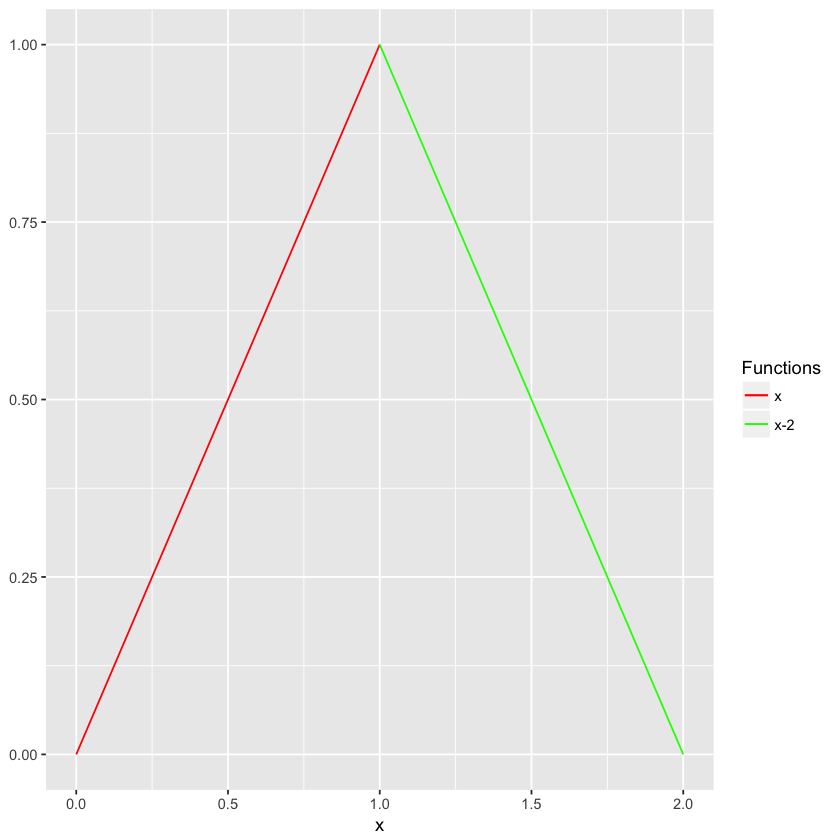

In [60]:
f1 <- function(x) x
f2 <- function(x) 2-x
plot.range1 <- data.frame(x=seq(0, 1), Functions = factor(1))
plot.range2 <- data.frame(x=seq(1, 2), Functions = factor(2))

ggplot(NULL, aes(x=x, colour=Functions)) +
  stat_function(data = plot.range1, fun = f1, xlim = c(0,1)) +
  stat_function(data = plot.range2, fun = f2,xlim=c(1,2)) +
  scale_colour_manual(values = c("red", "green"), labels = c("x", "x-2")) +
  theme(axis.title.y=element_blank())

<b>b)</b>Find the cdf of X and sketch its graph.

The CDF $F(X)= P(X\leq x) = \int_{-\infty}^{x}f(t)\ dt, -\infty < x < \infty$

$F(x)=\left\{
\begin{array}{ll}
    \int_{0}^{x}t\ dt, & 0\leq x \lt 1 \\
    \int_{0}^{1}x\ dx+\int_{1}^{x}2-t\ dt, & 1\leq x \lt 2 \\
\end{array} 
\right. \
$<br/>

Solving the integral:<br/>
$F(x)=\left\{
\begin{array}{ll}
    \frac{x^2}{2}, & 0\leq x \lt 1 \\
    2x - \frac{x^2}{2}-1, & 1\leq x \lt 2 \\
\end{array} 
\right. \
$<br/>



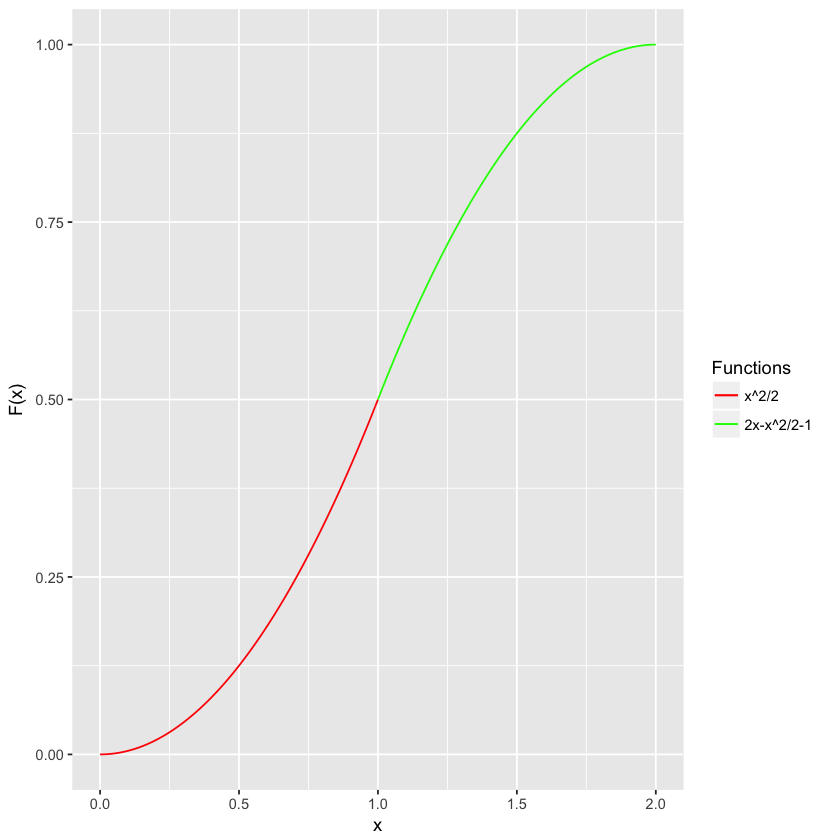

In [62]:
library(ggplot2)
f1 <- function(x) x^2*0.5
f2 <- function(x) 2*x-x^2*0.5-1


plot.range1 <- data.frame(x=seq(0, 1), Functions = factor(1))
plot.range2 <- data.frame(x=seq(1, 2), Functions = factor(2))
    
ggplot(NULL, aes(x=x, colour=Functions)) +
  stat_function(data = plot.range1, fun = f1, xlim = c(0,1)) +
  stat_function(data = plot.range2, fun = f2, xlim = c(1,2)) +
  scale_colour_manual(values = c("red", "green"), labels = c("x^2/2","2x-x^2/2-1")) + xlab("x") +
  ylab("F(x)") 

<b>c)</b>Find E(X), the expectation of X

$E(X)= \int_{-\infty}^{\infty}xf(x)\ dx = \int_{0}^{1}x^2\ dx\  +\ \int_{1}^{2}2x-x^2\ dx  $

$E(X)= \frac{x^3}{3}|_0^1 + x^2|_1^2 - \frac{x^3}{3}|_1^2 = 1$

<b>d)</b>Find $E(X^2)$, the second moment of X. Then find the variance $\sigma^2$ of $X$

$E(X^2)= \int_{0}^{1}x^3\ dx\  +\ \int_{1}^{2}2x^2-x^3\ dx  $<br/>
$E(X^2)=\frac{x^4}{4}|_0^1 + \frac{2}{3}x^3|_1^2 - \frac{x^4}{4}|_1^2$

In [63]:
e_x2=(1/4)+((16/3)-(2/3))-4+(1/4)
print(e_x2)

[1] 1.166667


$\sigma^2=M''(0)-[M'(0)]^2=E(X^2)-\mu^2$

In [64]:
var=1/2+14/3-4-1
print(var)

[1] 0.1666667


<b>e)</b>Find $M(t) = E(e^{tx})$, the mgf of X. Then find the value of $M(0)$. Further, find the value of $\lim_{t\to0} M(t)$.

$M(t)=E(e^{tx})= \int_{-\infty}^{\infty}e^{tx}f(x)\ dx$ <br/>
$M(t)=\int_{0}^{1}xe^{tx}\ dx\ +\ \int_{1}^{2}(2-x)e^{tx}\ dx$<br/>

Solving the integral by parts:
$M(t)= \frac{1}{t^2}-\frac{2}{t^2}e^t+\frac{1}{t^2}e^{2t}=\frac{1}{t^2}(1-2e^t+e^{2t})$<br/>
Since $M(0)$ is not defined and we have the form $\frac{0}{0}$, we can use L'Hopital rule:<br/>
$M'(0) = \lim_{t\to0}\frac{1-2e^t+e^{2t}}{t^2}$<br/>
Taking derivatives, <br/>
$M'(0) = \lim_{t\to0}\frac{\frac{d}{dt}1-2e^t+e^{2t}}{\frac{d}{dt}t^2}$<br/>
$M'(0) = \lim_{t\to0}\frac{2e^t-2e^{t}}{2t}$<br/>
Since we still have an indetermination $\frac{0}{0}$, we can use L'Hopital rule again and simplify:<br/>
$M'(0) = \lim_{t\to0}\frac{\frac{d}{dt}2e^t-2e^{t}}{\frac{d}{dt}2t}$<br/>
$M'(0) = \lim_{t\to0}2e^2t - e^t = 1$<br/>

<h3>Problem 4</h3>

The moment-generating function of a r.v. X is

$M(t)=\frac{e^{8t}-e^{4t}}{4t}\ t\neq0,\ and\ M(0) = 1 $

$M(t)$ has the same form as a Uniform Distribution of a r.v. $X$ with parameters<br/>
$b=8\ and\ a=4:$<br/>
$M(t)=\frac{e^{bt}-e^{at}}{(b-a)t}\ t\neq0,\ -\infty \lt a \lt b \lt \infty \ and\ M(0) = 1 $

<b>a)</b> Find $E(X)$

Using the definition for a Uniform distribution with parameters $b=8\ and\ a=4:$<br/>
$E(X) = \mu = \frac{a+b}{2}= 6$ 

$E(X)$ can also be found using the derivative $M'(0)$

In [2]:
m_1_t=D(expression((exp(8*t) - exp(4*t))/(4*t)),c("t"))
print(m_1_t)
t<-0
print(eval(m_1_t))


(exp(8 * t) * 8 - exp(4 * t) * 4)/(4 * t) - (exp(8 * t) - exp(4 * 
    t)) * 4/(4 * t)^2
[1] NaN


Using L'Hopital rule to find the limit:<br/>
$M'(0) = \lim_{t\to0}8e^{8t} - 2e^{4t}$ = 6

<br/>
Therefore, $E(X)=6$

<b>b)</b> Find $Var(X)$

$Var(X) = \sigma^2 = \frac{(b-a)^2}{12}$<br/>
$Var(X)= \frac{(8-4)^2}{12} = \frac{16}{12} = \frac{4}{3}$<br/>

An alternative solution would be $Var(X)= M''(0) - [M'(0)]^2$, however it's not necessary to do the calculation.

<b>c)</b> Find $P(4.5 < X < 7.5)$

Since $f(x)=\frac{1}{b-a},\ a \lt x \lt b$.<br/>
Then,<br/>
$P(4.5<X<7.5)=\int_{a}^{b}\frac{1}{8-4}dx$ <br/>
$P(4.5<X<7.5)=\int_{4.5}^{7.5}\frac{1}{4}dx = \frac{x}{4}|_{4.5}^{7.5}$ <br/>


In [65]:
p_x=7.5/4 - 4.5/4
print(p_x)

[1] 0.75


<h3>Problem 5 </h3>
Let X and Y have the joint pmf defined by f(0,0) = f(1,2) = 0.3, f(0,1) = f(1,1) = 0.2.

<b>a)</b>Represent the joint pmf by a table.

Probabilty matrix for X and Y - pmf:<br/>
<table>
<tr>
    <th></th>
    <th></th>
    <th></th>
    <th>Y</th>
    <th></th>
</tr>
<tr>
    <th></th>
    <th></th>
    <th>0</th>
    <th>1</th>
    <th>2</th>
</tr>
<tr>
    <th>x</th>
    <th>0</th>
    <td>0.3</td>
    <td>0.2</td>
    <td>0</td>
</tr>
<tr>
    <th></th>
    <th>1</th>
    <td>0</td>
    <td>0.2</td>
    <td>0.3</td>
</tr>
</table>

<b>b)</b>Give the marginal pmf’s of X and Y in the “margins” of the table in (a).
<table>
<tr>
    <th>x</th>
    <th>0</th>
    <th>1</th>
</tr>
<tr>
    <th>P(X=x)</th>
    <td>0.5</td>
    <td>0.5</td>
</tr>
</table>
<table>
<tr>
    <th>y</th>
    <th>0</th>
    <th>1</th>
    <td>2</td>
</tr>
<tr>
    <th>P(Y=y)</th>
    <td>0.3</td>
    <td>0.4</td>
    <td>0.3</td>
</tr>
</table>

<b>c)</b>Compute:<br/>  $\mu_X,\ \mu_Y,\ \sigma_X^2,\ \sigma_Y^2,\ Cov(X,Y),\ and\ \rho$.

$\mu_X=E(X)=0\times0.5+1\times0.5=0.5$<br/>
$\mu_Y=E(Y)=0\times0.3+1\times0.4+2\times0.3=1$<br/>
$\sigma_X^2=E(X^2)-[E(X)]^2=(0^2\times0.5+1^2\times0.5) - 0.5^2=0.25$<br/>
$\sigma_Y^2=E(Y^2)-[E(Y)]^2=(0^2\times0.3)+(1^2\times0.4)+2^2\times0.3-1^2=0.6$<br/>
$Cov(X,Y)= E(XY)-E(X)E(Y),\ where\ E(XY)=1\times0.2\times1+1\times2\times0.3=0.8$ <br/>Then</br/>
$Cov(X,Y) = 0.8-0.5 =0.3 $<br/>
<br/>
$\rho = Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_x\sigma_y}=\frac{0.3}{\sqrt(0.25)\times\sqrt(0.6)}=0.774596669241483$

<b>d)</b>Tabulate the conditional pmf of $Y$ given $X = 0$.

<table>
<tr>
    <th>Y</th>
    <th>0</th>
    <th>1</th>
    <td>2</td>
</tr>
<tr>
    <th>P(Y=y|x=0)</th>
    <td>0.3/0.5=0.6</td>
    <td>0.2/0.5=0.4</td>
    <td>0</td>
</tr>
</table>

<b>e)</b>Tabulate the conditional pmf of $X$ given $Y = 2$

<table>
<tr>
    <th>X</th>
    <th>0</th>
    <th>1</th>
</tr>
<tr>
    <th>P(X=x|y=2)</th>
    <td>0</td>
    <td>1</td>
</tr>
</table>

<h3>Problem 6 </h3>
Let $X$ and $Y$ be jointly normal random variables with parameters $\mu_X = 0,\ \sigma_X^2 = 1,\mu_Y =−1,\sigma_Y^2 =4,\ and\ \rho=0.5$.

<b>a)</b>For any constants $a, b, c, d$ derive the bivariate distribution of $(aX + bY, cX + dY )$ using the definition of the bivariate normal distribution from independent standard normal random variables and the fact - which you may assume - that a pair of random variables $(U, V)$ has a bivariate normal distribution if, and only if, for any numbers $e, f$ the random variable $eU + fV$ has normal distribution.

By Combination of indep’t Normal rv’s:<br/>
If $X$ and $Y$ are independent random variables each with normal distribution, then, for any numbers $a, b, c,$ the random variable:
$aX+bY+c \sim N(a\mu_x + b\mu_y +c,(a\sigma_x)^2+(b\sigma_y)^2)$. [1]

The two variables $X$ and $Y$ are jointly normal if they can be expressed in the form:<br/>
$X = aU + bV$ &nbsp;[2] <br/> 
$Y= cU+dV$ <br/>

where U and V are independent normal variables.<br/>

By [1] we can say for any linear combination:<br/>
$Z=w_1X+w_2Y$ [3]<br/>
has a normal distribution.<br/>

If we have $X=aU+bV$ and $Y=cU+dV$ for the independent random variables $U$ and $V$, then<br/>
in [3]<br/>
$Z=w_1(aU+bV) + w_2(cU+dV)$<br/>
$Z=w_1aU+w_1bV+w_2cU+w_2dV$<br/>
$Z=(w_1a+w_2b)U + (w_1b+w_2d)V$<br/>

By [2]
Z is normal since is the sum of independent normal variables.

<br/>
according to [1], the bivariate distribution is:<br/>
$aU+bV \sim N(a\mu_U + b\mu_V,(a\sigma_U)^2+(b\sigma_V)^2)$<br/>
$cU+dV \sim N(c\mu_U + d\mu_V,(c\sigma_U)^2+(d\sigma_V)^2)$<br/>

The joint pdf of bivariate normal<br/>
$f(X,Y)=\frac{1}{2\pi\sigma_X\sigma_Y\sqrt(1-\rho^2)}\times e^{-\frac{z_X^2(x)-2\rho z_X(x) z_Y(y)+z_Y^2(y)}{2(1-\rho^2)}}$
<br/>
where <br/>
$X = aU + bV$ <br/> 
$Y= cU+dV$ <br/>

<b>b)</b>Find $P(X +Y > 0)$.

Since X and Y are jointly normal, the variable X + Y is also normal.<br/>
By the conclusion in <b>a)</b>, the distribution follow the form:<br/>
$X+Y \sim N(\mu_x + \mu_y,\sigma_x^2+\sigma_y^2)$ then, <br/>
$X+Y \sim N(-1,5)$.

To find $P(X +Y > 0)$ I will use R.

In [66]:
print(pnorm(0,mean = -1,sd = sqrt(5),lower.tail = FALSE))

[1] 0.3273604


<b>c)</b>Find the constant a so that $aX + Y$ and $X + 2Y$ are independent

Let $U = aX + Y$ and $V = X + 2Y$ are independent random variables. Then Corr(U,V)=0 </br>
$Corr(aX+Y,X+2Y)=0$ and consequently $Cov(aX+Y,X+2Y)=0$ <br/>
Given that <br/>
$Cov(U,V)= E(UV)- E(U)E(V)$ using the calculations and resolve for $U$ and $V$ is known that:<br>
$Cov(aX+Y,X+2Y)=aVar(X)+2Var(Y)+(1+2a)Cov(X,Y)$<br/>
$Cov(aX+Y,X+2Y)=aVar(X)+2Var(Y)+(1+2a)(1)$ (Since $Cov(X,Y)=\rho\times\sigma_x\times\sigma_y=1$)<br/>
$Cov(aX+Y,X+2Y)=a+8+1+2a$<br/>
$Cov(aX+Y,X+2Y)=3a+9=0$<br/>
<br/>
Given that $Cov(aX+Y,X+2Y)=0$ then:<br/>
$a=-3$<br/>

<b>d)</b>Find $P(X+Y >0|2X−Y =0)$.

Let $U = X+ Y$ and $V=2X-Y$ <br/>
Now using the definition of Expectation:<br/>
$E(U)=E(X)+E(Y)=0-1=-1$<BR/>
$E(V)=2E(X)-E(Y)=1$<BR/>
Then,
$\mu_U=-1$ and $\mu_V=1<br/>

Let's find the Covariance for (U,V)<br/>
$Cov(U,V) = E(UV) - E(U)E(V)$<br/>
where <br/>
$E(UV)=E((x+y)(2x-y)=E(2x^2-2xy+2xy-y^2)$<br/>
$E(UV)=2E(x^2)-E(y^2)$<br/>
<br/>
Now, from Variance definition: $Var(X)=E(X^2)-[E(X)]^2$, then <br/>
$E(X^2)=Var(X)+[E(X)]^2=1+0=1$<br/>
$E(Y^2)=Var(Y)+[E(Y)]^2=4+1=5$<br/>

Replacing for $E(UV):$<br/>
$E(UV)=2(1)-5=-3$<br/>

Taking this result for $Cov(U,V)$:<br/>
$Cov(U,V) = E(UV) - E(U)E(V)=-3-\mu_U \times \mu_V =-2$<br/>

With covariance we can find the variances for $U$ and $V$:<br/>
$Cov(X,Y)=\rho \times \sigma_X \times \sigma_Y=0.5 \times 1 \times \sqrt(4)=1$<br/>
$\sigma_U^2=Var(X+Y)=Var(X)+Var(Y)+2Cov(X,Y)=1+4+2=7$<br/>
$\sigma_V^2=Var(2X-Y)=2^2Var(X)+Var(Y)-2(2)Cov(X,Y)=4(1)+4-4=4$<br/>

Then,
$\sigma_U^2=4$ and $\sigma_V^2=7$ <br/>

and,<br/>
$\rho_{U,V}=Corr(U,V)=\frac{Cov(U,V)}{\sigma_U\sigma_V}=\frac{-2}{2\times \sqrt(7)}=-\frac{1}{\sqrt(7)}$<br/>

Finally, we can calculate the conditional probability:<br/>

$U|V_{=v} \sim N(\mu_U+\rho_{U,V}\sigma_Uz_v(v), (1-\rho_{U,V}^2)\sigma_V^2)$<br/>

where <br/>
$z_v(v)=\frac{v-\mu_V}{\sigma_V}$<br/>
$z_v(v=0)=\frac{0-1}{2}=-\frac{1}{2}$<br/>

Replacing the values:<br/>

$U|V_{=0} \sim N(-1+(-\frac{1}{\sqrt(7)})(\sqrt(7)(-\frac{1}{2})\ ,\ [1-(\frac{-1}{2})^2]4)$<br/>
$U|V_{=0} \sim N(-\frac{1}{2},3)$<br/>

To find $P(U >0|V =0)$ = $P(X+Y >0|2X−Y =0)$. Let´s compute in R to get the result:

In [67]:
print(pnorm(0,mean = -0.5,sd = sqrt(3),lower.tail = FALSE))

[1] 0.386415
